In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

<AxesSubplot:>

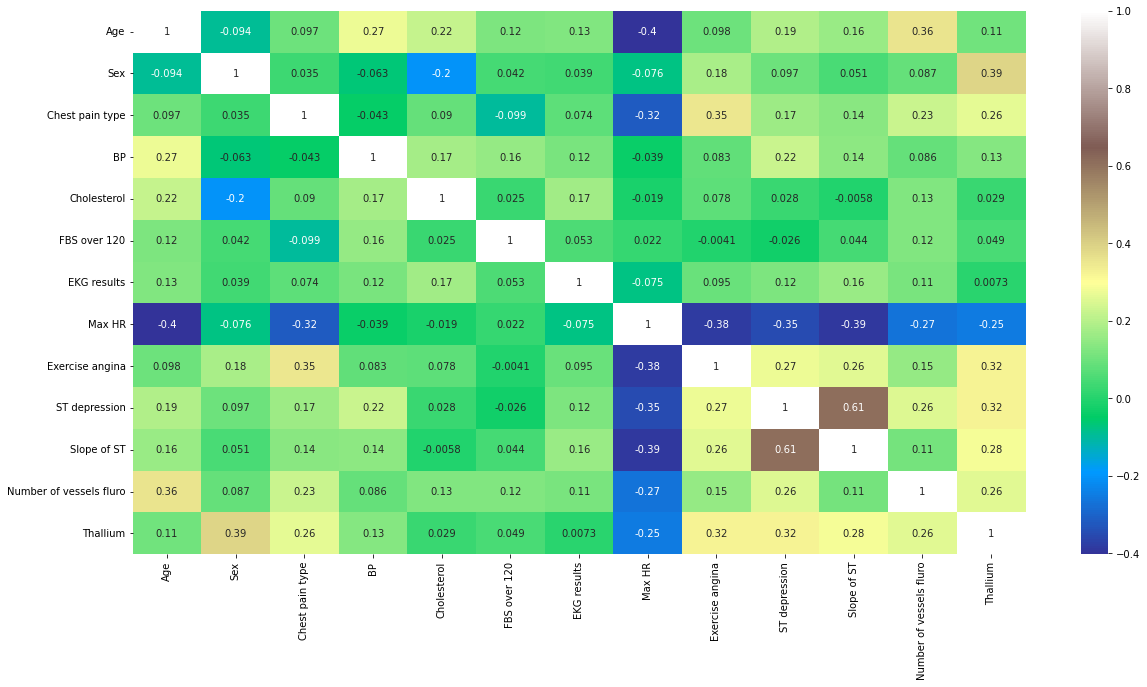

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

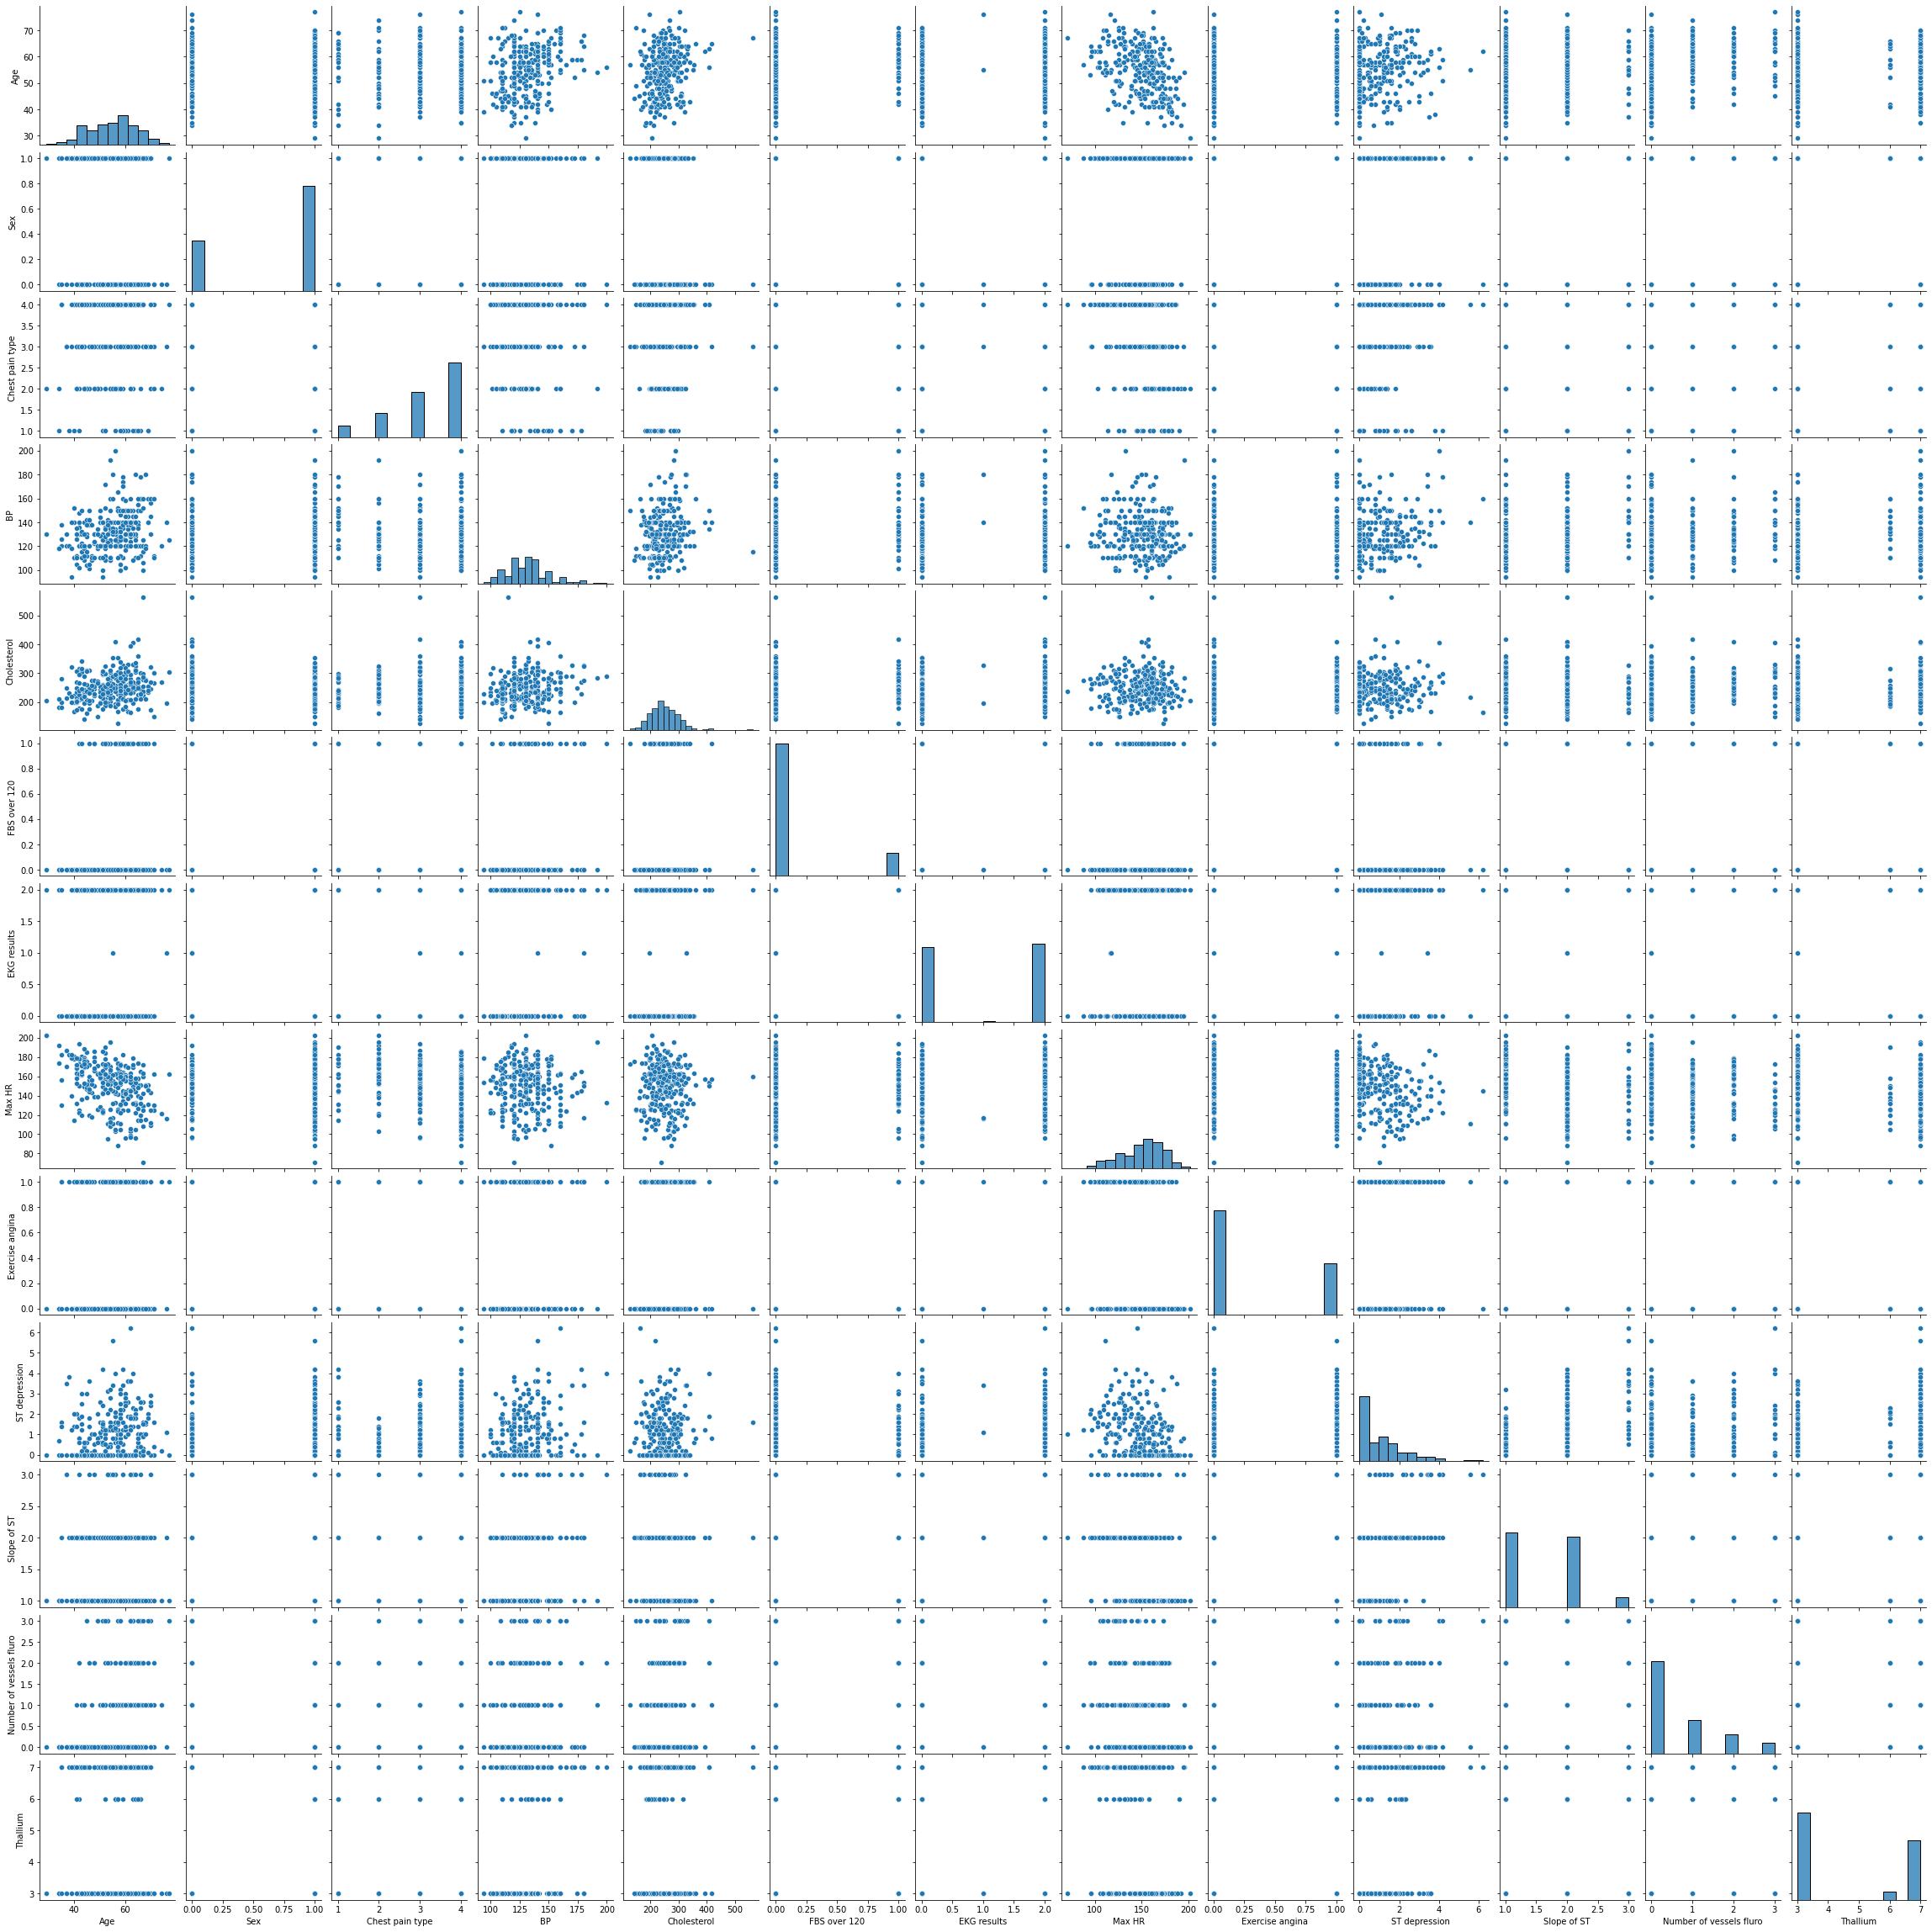

In [7]:
sns.pairplot(data=df)

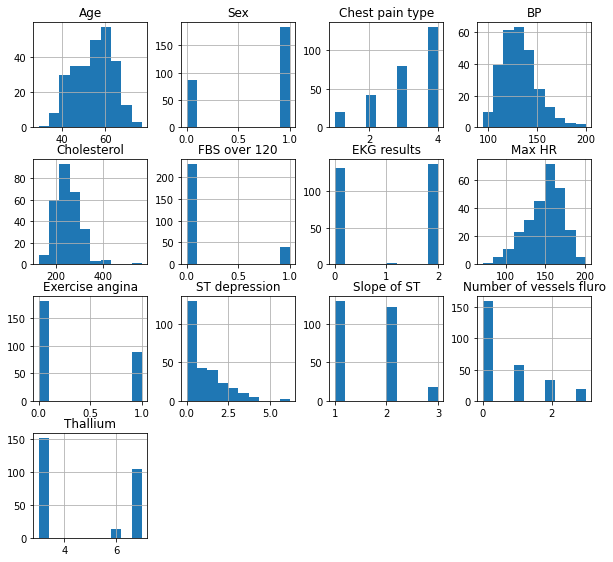

In [8]:
df.hist(figsize=(10,12), layout=(5,4));

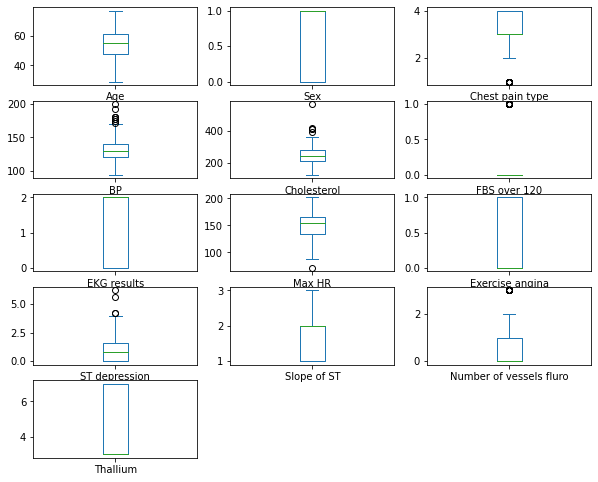

In [9]:
df.plot(kind='box', subplots=True, layout=(6,3), figsize=(10,10))
plt.show()


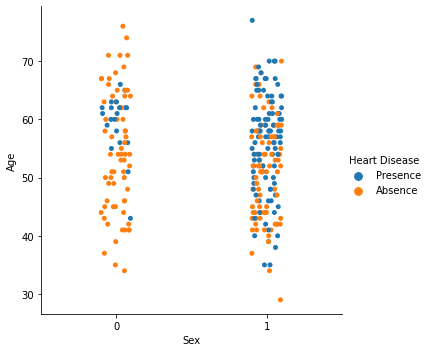

In [10]:
sns.catplot(data=df, x='Sex', y='Age', hue='Heart Disease', palette='tab10')

<AxesSubplot:xlabel='Sex', ylabel='Cholesterol'>

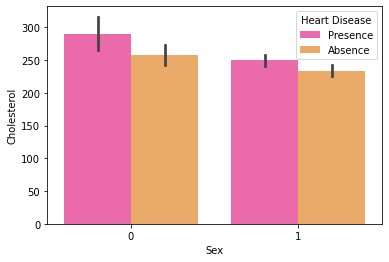

In [11]:
sns.barplot(data=df, x='Sex', y='Cholesterol', hue='Heart Disease', palette='spring')


In [12]:
df['Sex'].value_counts()


1    183
0     87
Name: Sex, dtype: int64

In [13]:
df['Chest pain type'].value_counts()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

<AxesSubplot:xlabel='Chest pain type', ylabel='count'>

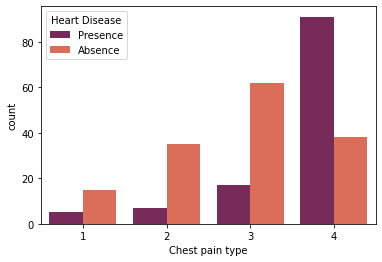

In [14]:
sns.countplot(x='Chest pain type', hue='Heart Disease' , data=df, palette='rocket')

In [15]:
gen = pd.crosstab(df['Sex'], df['Heart Disease'])
print(gen)

Heart Disease  Absence  Presence
Sex                             
0                   67        20
1                   83       100


<AxesSubplot:xlabel='Sex'>

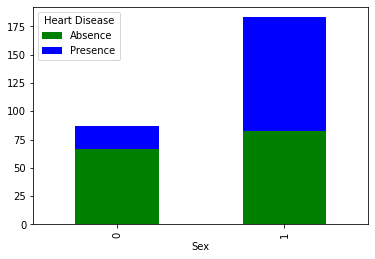

In [16]:
gen.plot(kind='bar', stacked='True', color=['green','blue'],grid=False)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
columns_to_scale=['Age', 'EKG results', 'Cholesterol', 'Thallium', 'Number of vessels fluro']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [28]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,130,1.402212,0,0.981664,109,0,2.4,2,2.472682,-0.875706,Presence
1,1.382140,0,3,115,6.093004,0,0.981664,160,0,1.6,2,-0.711535,1.189277,Absence
2,0.282294,1,2,124,0.219823,0,-1.026285,141,0,0.3,1,-0.711535,1.189277,Presence
3,1.052186,1,4,128,0.258589,0,-1.026285,105,1,0.2,2,0.349871,1.189277,Absence
4,2.152032,0,2,120,0.374890,0,0.981664,121,1,0.2,1,0.349871,-0.875706,Absence


In [32]:
x=df.drop(['Heart Disease'], axis=1)
y=df['Heart Disease']

In [34]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=40)
print('x_train-', x_train.size)
print('x_test-', x_test.size)
print('y_train-', y_train.size)
print('x_test-', x_test.size)

x_train- 2457
x_test- 1053
y_train- 189
x_test- 1053


In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction1)
cm


array([[39,  6],
       [ 9, 27]], dtype=int64)

<AxesSubplot:>

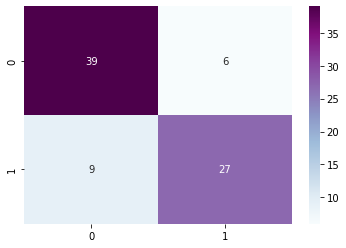

In [36]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [37]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:', (TP+TN+FN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9259259259259259


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)


0.8148148148148148

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

     Absence       0.81      0.87      0.84        45
    Presence       0.82      0.75      0.78        36

    accuracy                           0.81        81
   macro avg       0.82      0.81      0.81        81
weighted avg       0.82      0.81      0.81        81



In [40]:
print('NB :', accuracy_score(y_test, prediction1))

NB : 0.8148148148148148
